In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
diabetes = pd.read_csv('diabetes_data.csv')

In [ ]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female
...,...,...,...,...,...,...,...,...,...,...
773,6,103,72,32,190,37.7,0.324,55,0,Female
774,1,71,48,18,76,20.4,0.323,22,0,Female
775,0,117,0,0,0,33.8,0.932,44,0,Female
776,4,154,72,29,126,31.3,0.338,37,0,Female


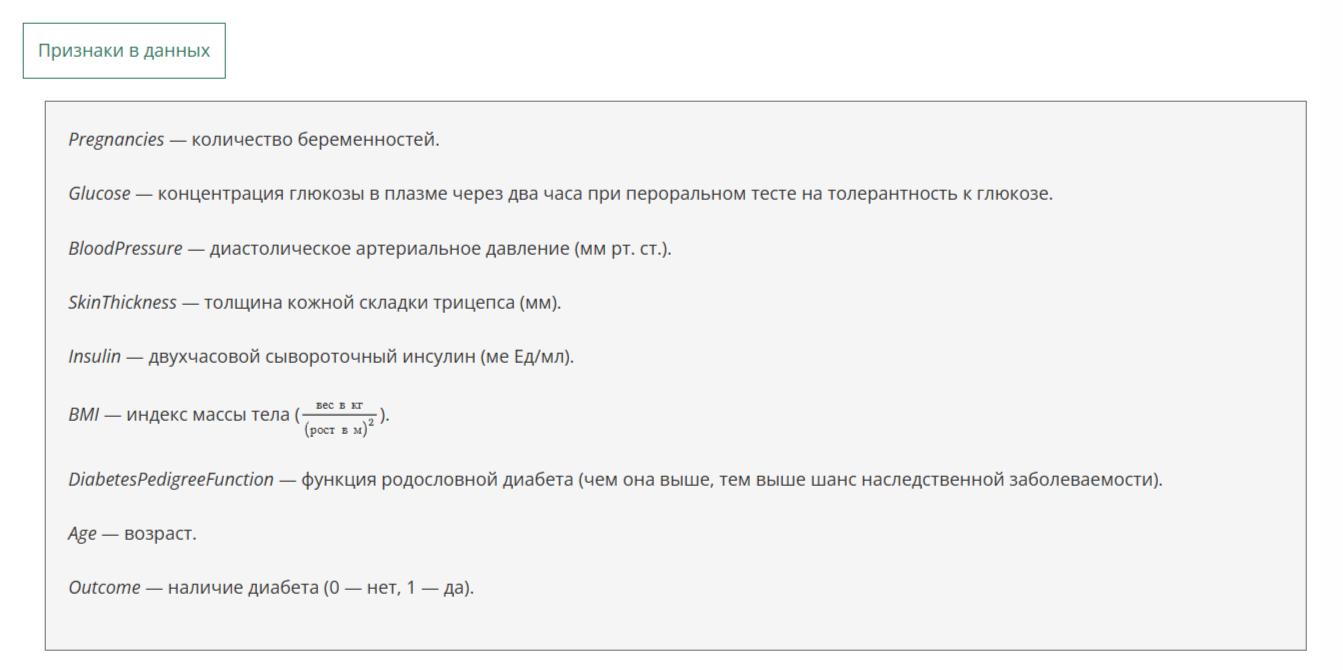

In [ ]:
for col in diabetes.columns:
  print(f'Доля уникальных значений для столба {col} составляет {((diabetes[col].nunique() / diabetes[col].count()) *  100).round(2)}%')

Доля уникальных значений для столба Pregnancies составляет 2.19%
Доля уникальных значений для столба Glucose составляет 17.48%
Доля уникальных значений для столба BloodPressure составляет 6.04%
Доля уникальных значений для столба SkinThickness составляет 6.56%
Доля уникальных значений для столба Insulin составляет 23.91%
Доля уникальных значений для столба BMI составляет 31.88%
Доля уникальных значений для столба DiabetesPedigreeFunction составляет 66.45%
Доля уникальных значений для столба Age составляет 6.68%
Доля уникальных значений для столба Outcome составляет 0.26%
Доля уникальных значений для столба Gender составляет 0.13%


In [ ]:
diabetes.duplicated().value_counts()

,count
False,768
True,10


In [ ]:
diabetes.drop_duplicates(inplace=True)

In [ ]:
diabetes.shape

(768, 10)

Далее найдите все неинформативные признаки в данных и избавьтесь от них. В качестве порога информативности возьмите 0.95: удалите все признаки, для которых 95 % значений повторяются или 95 % записей уникальны. В ответ запишите имена признаков, которые вы нашли (без кавычек).

In [ ]:
delete_col = []
for col in diabetes.columns:
  top_freq = diabetes[col].value_counts(normalize=True).max()
  uniq = diabetes[col].nunique() / diabetes[col].count()

  if top_freq > 0.95:
    delete_col.append(col)
    print(f'Для столбца {col} {top_freq*100}% значений повторяются')

  if uniq > 0.95:
    delete_col.append(col)
    print(f'Для столбца {col} {uniq*100}% уникальных значений')


Для столбца Gender 100.0% значений повторяются


In [ ]:
diabetes.drop(columns=delete_col, inplace=True)

In [ ]:
diabetes.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
columnes = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columnes:
  diabetes[col] = diabetes[col].apply(lambda x: np.nan if x == 0 else x)

In [ ]:
diabetes.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,190.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,NaN,35.7,0.148,21,0
2,2,108.0,64.0,NaN,NaN,30.8,0.158,21,0
3,8,107.0,80.0,NaN,NaN,24.6,0.856,34,0
4,7,136.0,90.0,NaN,NaN,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...,...
763,5,139.0,64.0,35.0,140.0,28.6,0.411,26,0
764,1,96.0,122.0,NaN,NaN,22.4,0.207,27,0
765,10,101.0,86.0,37.0,NaN,45.6,1.136,38,1
766,0,141.0,NaN,NaN,NaN,42.4,0.205,29,1


In [ ]:
diabetes[diabetes['Insulin'].isnull()].shape[0] / diabetes['Insulin'].shape[0]

0.4869791666666667

In [ ]:
a = diabetes.shape[0] * 0.7
diabetes.dropna(thresh=a, axis=1, inplace=True)

In [ ]:
diabetes.shape

(768, 8)

In [ ]:
b = diabetes.shape[1]
diabetes.dropna(thresh=b-2, axis=0, inplace=True)
diabetes.shape

(761, 8)

In [ ]:
diabetes.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,28
SkinThickness,220
BMI,4
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
for col in diabetes.columns:
  if diabetes[col].isnull().sum() > 0:
    median_col = diabetes[col].median()
    diabetes[col] = diabetes[col].fillna(median_col)

In [ ]:
diabetes['SkinThickness'].mean()

np.float64(29.109067017082786)

In [ ]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5):
    if isinstance(data, str):  # Проверка, если передан путь к файлу
        data = pd.read_csv(data)
    x = data[feature]
    quantile_1, quantile_3 = x.quantile(0.25), x.quantile(0.75)
    iqr = quantile_3 - quantile_1
    lower_bound = quantile_1 - (iqr * left)
    upper_bound = quantile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr_mod(diabetes, 'SkinThickness')
outliers.shape

(87, 8)

In [ ]:
diabetes.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:

def outliers_z_score(data, feature, log_scale=False):
  if log_scale:
    x = np.log(data[feature] + 1)
  else:
    x = data[feature]

  mu = np.mean(x)
  sigma = np.std(x)
  lower_bound = mu - 3 * sigma
  upper_bound = mu + 3 * sigma
  outliers = data[(x < lower_bound) | (x > upper_bound)]
  cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
  return outliers, cleaned

outliers, cleaned = outliers_z_score(diabetes, 'SkinThickness')
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 4
Результирующее число записей: 757


In [ ]:
def outliers_iqr_mod(data, feature, log_scale=False, left=1.5, right=1.5):
    if isinstance(data, str):  # Проверка, если передан путь к файлу
        data = pd.read_csv(data)

    if log_scale:
      x = np.log(data[feature])
    else:
      x = data[feature]
    quantile_1, quantile_3 = x.quantile(0.25), x.quantile(0.75)
    iqr = quantile_3 - quantile_1
    lower_bound = quantile_1 - (iqr * left)
    upper_bound = quantile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

In [ ]:
outliers, cleaned = outliers_iqr_mod(diabetes, 'DiabetesPedigreeFunction')
outliers.shape[0]

29

In [ ]:
outliers_l, cleaned_l = outliers_iqr_mod(diabetes, 'DiabetesPedigreeFunction', log_scale=True)
outliers_l.shape[0]

0

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_par = pd.read_excel('Data_TSUM.xlsx', sheet_name='Data_Parsing')
df_comp = pd.read_excel('Data_TSUM.xlsx', sheet_name='Data_Company')

In [31]:
df_par

,brand,Category,producer_id,producer_color,price
0,Valentino,Shoes,aaaaa1111_11,black,167
1,Valentino,Shoes,aaaaa1111_12,black,188
2,Valentino,Shoes,aaaaa1111_13,black,184
3,Valentino,Shoes,aaaaa1111_14,bla//ck,196
4,Valentino,Shoes,aaaaa1111_15,bla\\ck,250
...,...,...,...,...,...
70,Stone Island,Bags,sssss1111_31,~~~red,164
71,Stone Island,Bags,sssss1111_32,~~~red,158
72,Stone Island,Bags,sssss1111_33,~~~red,194
73,Stone Island,Bags,sssss1111_34,~~~red,256


In [32]:
df_comp

,brand,Category,item_id,color_id,current price
0,Valentino,Shoes,aaaaa111111,black,247
1,Valentino,Shoes,aaaaa111112,black,161
2,Valentino,Shoes,aaaaa111113,black,234
3,Valentino,Shoes,aaaaa111114,black,167
4,Valentino,Shoes,aaaaa111115,black,153
...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,red,165
71,Stone Island,Bags,sssss111132,red,196
72,Stone Island,Bags,sssss111133,red,236
73,Stone Island,Bags,sssss111134,red,222


Подтянуть к базе парсинга данные из базы компании (item_id, color_id, current_price) и сформировать столбец разницы цен в % (цена конкурента к нашей цене).

In [33]:
def deleter(x):
  l = []
  x_split = list(x)
  for i in x_split:
    if i.isdigit() or i.isalpha():
      l.append(i)
  return ''.join(l)

In [34]:
df_par['producer_id'] = df_par['producer_id'].apply(deleter)

In [35]:
df_par

,brand,Category,producer_id,producer_color,price
0,Valentino,Shoes,aaaaa111111,black,167
1,Valentino,Shoes,aaaaa111112,black,188
2,Valentino,Shoes,aaaaa111113,black,184
3,Valentino,Shoes,aaaaa111114,bla//ck,196
4,Valentino,Shoes,aaaaa111115,bla\\ck,250
...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,~~~red,164
71,Stone Island,Bags,sssss111132,~~~red,158
72,Stone Island,Bags,sssss111133,~~~red,194
73,Stone Island,Bags,sssss111134,~~~red,256


In [36]:
df = df_par.merge(df_comp, how='left', left_on='producer_id', right_on='item_id')

In [37]:
df.drop(columns=['item_id', 'producer_color', 'Category_y'], inplace=True)

In [38]:
df

,brand_x,Category_x,producer_id,price,brand_y,color_id,current price
0,Valentino,Shoes,aaaaa111111,167,Valentino,black,247
1,Valentino,Shoes,aaaaa111112,188,Valentino,black,161
2,Valentino,Shoes,aaaaa111113,184,Valentino,black,234
3,Valentino,Shoes,aaaaa111114,196,Valentino,black,167
4,Valentino,Shoes,aaaaa111115,250,Valentino,black,153
...,...,...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,164,Stone Island,red,165
71,Stone Island,Bags,sssss111132,158,Stone Island,red,196
72,Stone Island,Bags,sssss111133,194,Stone Island,red,236
73,Stone Island,Bags,sssss111134,256,Stone Island,red,222


In [39]:
df['different_price'] = (df['price']/df['current price'] * 100).round(1)

In [40]:
df

,brand_x,Category_x,producer_id,price,brand_y,color_id,current price,different_price
0,Valentino,Shoes,aaaaa111111,167,Valentino,black,247,67.6
1,Valentino,Shoes,aaaaa111112,188,Valentino,black,161,116.8
2,Valentino,Shoes,aaaaa111113,184,Valentino,black,234,78.6
3,Valentino,Shoes,aaaaa111114,196,Valentino,black,167,117.4
4,Valentino,Shoes,aaaaa111115,250,Valentino,black,153,163.4
...,...,...,...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,164,Stone Island,red,165,99.4
71,Stone Island,Bags,sssss111132,158,Stone Island,red,196,80.6
72,Stone Island,Bags,sssss111133,194,Stone Island,red,236,82.2
73,Stone Island,Bags,sssss111134,256,Stone Island,red,222,115.3


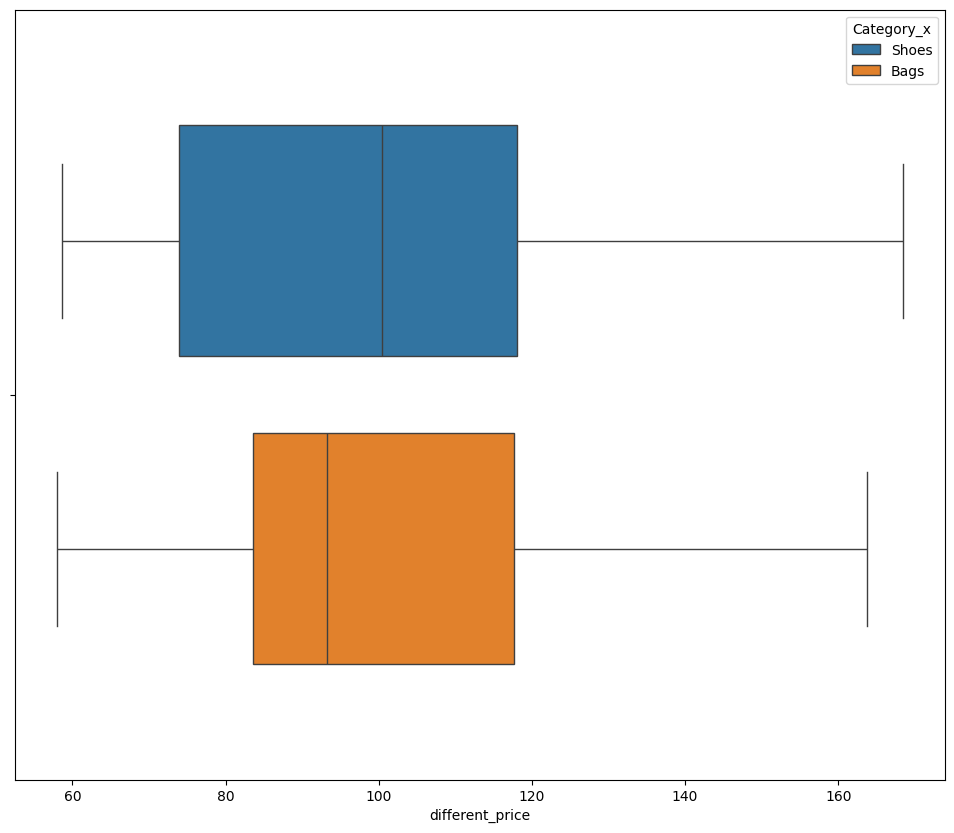

In [51]:
import seaborn as sns
fig = plt.figure(figsize=(12, 10))
boxplot = sns.boxplot(
    data=df,
    x=df['different_price'],
    hue=df['Category_x'],
    widths=0.3)


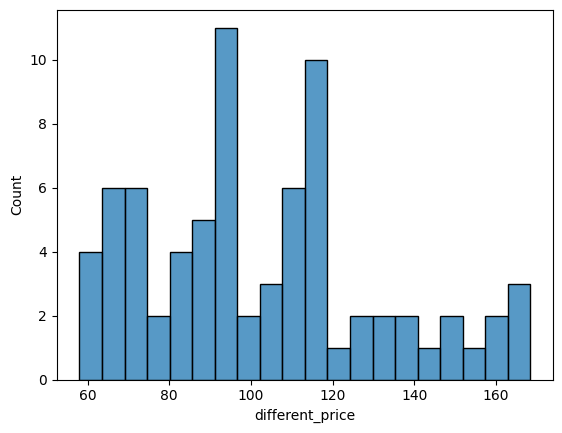

In [42]:
histplot = sns.histplot(
    data=df,
    x=df['different_price'],
    bins=20
)

In [52]:
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1)
    upper_bound = quartile_3 + (iqr * 1)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr(df, 'different_price')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 6
Результирующее число записей: 69
